# PROJECT - PART 3: DATA ANALYSIS

___


---

<a id="top"></a>
- [Task 1](#task_1)  
- [Task 2](#task_2)  
- [Task 3](#task_3)  
- [Task 4](#task_4)  
- [Task 5](#task_5)  
- [Task 6](#task_6)  
- [Task 7](#task_7)  
- [Task 8](#task_8)  
- [Task 9](#task_9)  
- [Task 10](#task_10)  

---

In [ ]:
# Import the necessary libraries and connect to the database
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from datetime import datetime, date

pd.set_option('display.max_rows', None)

# INSTRUCTIONS
# ------------
# Download the database from the server and place it in the same folder as this Jupyter notebook, since SQLite
# is a file database and it is not meant to be connected via any server.
# Otherwise, run it in the server or adjust the path as needed
SQLITE_SRV = 'sqlite:///'
current_path = ''
DB_NAME = 'vaccination_db.db3'
engine = create_engine(SQLITE_SRV + current_path + DB_NAME, echo=False)

---

<a id="task_1"></a>
[Top](#top)

**1. Create a dataframe for patients and symptoms containing the following columns: (1)
ssNO, (2) gender, (3) dateOfBirth, (4) symptom, (5) diagnosisDate. Create a table
named ”PatientSymptoms” using the command to sql with options index = True, if exists
= "replace".**

In [ ]:
with engine.connect() as connection:
    patient_symptoms_query = """SELECT ssNo, gender, dateOfBirth, symptom, date
                        FROM Patient 
                        JOIN Diagnosis
                        ON ssNo = patient;"""
    patient_symptoms_df = pd.read_sql_query(patient_symptoms_query, connection)
    patient_symptoms_df.rename(columns={"date": "diagnosisDate"}, inplace=True)
    patient_symptoms_df.to_sql('PatientSymptoms', connection, if_exists='replace', index=True)
    patient_symptoms_sql_table = pd.read_sql_query("""SELECT * FROM PatientSymptoms""",
                                                   connection)
    display(patient_symptoms_sql_table)

,index,ssNo,gender,dateOfBirth,symptom,diagnosisDate
0,0,790503-394M,F,1979-05-03,anaphylaxia,2021-01-30
1,1,000127-4899,F,2000-01-27,blurring of vision,2021-02-01
2,2,090707-295R,F,2009-07-07,chest pain,2021-02-15
3,3,810616-9029,M,1981-06-16,chest pain,2021-04-30
4,4,701127-5340,F,1970-11-27,chills,2021-04-10
5,5,130205-474D,F,2013-02-05,chills,2021-05-11
6,6,210318-737O,F,2021-03-18,diarrhea,2021-03-20
7,7,041122-6308,M,2004-11-22,diarrhea,2021-05-15
8,8,041122-6308,M,2004-11-22,diarrhea,2021-06-16
9,9,880706-240U,M,1988-07-06,diarrhea,2021-02-16


------

<a id="task_2"></a>
[Top](#top)

**2. Create a dataframe for patients and vaccines containing the following columns: (1) patientssNO, (2) date1, (3) vaccinetype1, (4) date2, (5) vaccinetype2. The attribute ”date1” and ”date2” refer to the date when the first and/or second dose were given to a patient respectively. Similarly, ”vaccinetype1” and ”vaccinetype2” are the type of vaccine used for the first and/or second dose. The value of the attribute should be NULL if the patient has not received some dose. Create a table named ”PatientVaccineInfo” using the dataframe as in Task 1.**

In [ ]:
with engine.connect() as connection:
    #gets patients and their vaccination info
    patient_vaccine_query = """SELECT patientSsNo, PatientVaccinationEvent.date, vaccineID FROM PatientVaccinationEvent
                                JOIN VaccinationEvent
                                ON VaccinationEvent.date = PatientVaccinationEvent.date 
                                AND PatientVaccinationEvent.location = VaccinationEvent.location
                                JOIN VaccineBatch ON VaccinationEvent.batchID = VaccineBatch.batchID
                                JOIN Manufacturer ON Manufacturer.ID = manufacturerID
                                JOIN Vaccine ON vaccineID = Vaccine.ID
                                ORDER BY patientSsNo, VaccinationEvent.date"""
    
    # -Labels each row as being the first or second dose given 
    # -Splits dataframe by category(first/second), rename columns, and merge
    # -Turns the final dataframe to sql table
    patient_vaccine_df = pd.read_sql_query(patient_vaccine_query, connection)
    patient_vaccine_df['count'] = patient_vaccine_df.groupby('patientSsNo').cumcount()+1
    df2 = patient_vaccine_df.loc[patient_vaccine_df['count'] == 2]
    df2 = df2.drop('count', axis=1)  
    df2 = df2.rename(columns={'date': 'date2', 'vaccineID': 'vaccinetype2'})
    df1_new = patient_vaccine_df.loc[patient_vaccine_df['count'] != 2]
    df1_new = df1_new.drop('count', axis=1)
    df1_new = df1_new.rename(columns={'date': 'date1', 'vaccineID': 'vaccinetype1'})
    final_df = pd.merge(df1_new, df2, on='patientSsNo', how='left')
    final_df.to_sql('PatientVaccineInfo', connection, if_exists='replace', index=True)
    
    #testing the created new table
    patient_vaccine_sql_table = pd.read_sql_query("""SELECT * FROM PatientVaccineInfo""",
                                                   connection)
    display(patient_vaccine_sql_table)

,index,patientSsNo,date1,vaccinetype1,date2,vaccinetype2
0,0,000127-4899,2021-01-30,V01,None,None
1,1,000325-6271,2021-05-10,V02,None,None
2,2,000506-642P,2021-05-10,V01,None,None
3,3,010201-5814,2021-05-14,V03,None,None
4,4,010327-525G,2021-03-16,V01,2021-05-10,V02
5,5,011103-6045,2021-05-14,V03,None,None
6,6,021001-957O,2021-01-30,V01,None,None
7,7,021130-649D,2021-05-10,V02,None,None
8,8,031127-2165,2021-03-16,V01,None,None
9,9,041030-267L,2021-01-30,V03,None,None


---

<a id="task_3"></a>
[Top](#top)

**3. Create a dataframe using the table ”PatientSymptoms” and separate it into two dataframes, one for males and one for females. What are the top three most common symptoms for males and females?**

In [ ]:
with engine.connect() as connection:
    patient_symptom_df_query = \
    """
        SELECT * FROM PatientSymptoms
    """
    patient_symptom_df = pd.read_sql_query(patient_symptom_df_query, connection)
    patient_symptom_df_grouped = patient_symptom_df.groupby(patient_symptom_df.gender)
    patient_symptom_df_male = patient_symptom_df_grouped.get_group('M')
    patient_symptom_df_female = patient_symptom_df_grouped.get_group('F')
    
    print('\nTop 5 most common symptoms for males:')
    display(patient_symptom_df_male['symptom'].value_counts().to_frame()[0:5])
    print('\nTop 5 most common symptoms for females:')
    display(patient_symptom_df_female['symptom'].value_counts().to_frame()[0:5])


Top 5 most common symptoms for males:


,symptom
joint pain,10
muscle ache,7
headache,6
fever,6
diarrhea,5



Top 5 most common symptoms for females:


,symptom
muscle ache,8
headache,7
fever,4
feelings of illness,4
joint pain,4


For males joint pain is diagnosed 10 times which is the most common symptom. After that muscle ache is diagnosed 7 times and headache and fever are diagnosed 6 times each.
For females muscle ache is the most common symptoms which is diagnosed 8 times, headache is the second most common symptom and is diagnosed 7 times. Fever, feelings of illness and joint pain are all diagnosed 4 times each.

---

<a id="task_4"></a>
[Top](#top)

**4. Create a dataframe using table ”Patient” and add the 'ageGroup' column for each patient. The age groups are ”0-10”, ”10-20”, ”20-40”, ”40-60”, ”60+”.**

In [ ]:
## CALCULATE THE AGE GROUP
with engine.connect() as connection:
    def ageGroup(birth):
        birth = datetime.strptime(birth, "%Y-%m-%d").date()
        today = date.today()
        age = today.year - birth.year - ((today.month, today.day) < (birth.month, birth.day))
        if 0 <= age <=10:
            ageGroup = "0-10"
        elif 10 < age <= 20:
            ageGroup = "10-20"
        elif 20 < age <= 40:
            ageGroup = "20-40"
        elif 40 <age <= 60:
            ageGroup = "40-60"
        elif age > 60:
            ageGroup = "60+"
        return ageGroup
            
    patient_query = """
        select * from Patient
        """
    patient_df = pd.read_sql_query(patient_query, connection)    
    patient_4_df = pd.DataFrame(patient_df, columns = ['ssNo','name','dateOfBirth','gender','ageGroup'])
    patient_4_df['ageGroup'] = patient_4_df['dateOfBirth'].apply(ageGroup)
    print('Dataframe of Patient with age group column:')
    display(patient_4_df)

Dataframe of Patient with age group column:


,ssNo,name,dateOfBirth,gender,ageGroup
0,841229-112N,Rodolfo O'Reilly,1984-12-29,M,20-40
1,780214-1893,Prof. Erling Morar MD,1978-02-14,F,40-60
2,950303-191X,Dr. Simeon Keeling II,1995-03-03,M,20-40
3,730218-253D,Dereck Beer,1973-02-18,M,40-60
4,971214-2818,Prof. Brice Metz PhD,1997-12-14,M,20-40
5,060325-323X,Darlene Brakus,2006-03-25,F,10-20
6,021201-3734,Prof. Raymond Beahan,2002-12-01,M,10-20
7,990614-395X,Josefa Greenfelder DVM,1999-06-14,M,20-40
8,050218-4796,Ms. Hassie Runolfsson PhD,2005-02-18,F,10-20
9,000127-4899,Ms. Opal Lang,2000-01-27,F,20-40


---

<a id="task_5"></a>
[Top](#top)

**5. Using the same dataframe as in the previous step, add a column describing each patient’s vaccination status. The statuses are defined as ”0” for not vaccinated, ”1” for vaccinated once, and ”2” for fully-vaccinated.**


In [ ]:
with engine.connect() as connection:
    patient_query_5 = """
            select ssNo, count(PVE.patientSsNo) as VaccinationStatus
            from Patient  LEFT JOIN PatientVaccinationEvent PVE
            on Patient.ssNo = PVE.patientSsNo
            group by Patient.ssNo    
        """
    patient_df5 = pd.read_sql_query(patient_query_5,connection)
    patient_merged_df45 = patient_4_df.join(patient_df5.set_index('ssNo'), on='ssNo')
    print('Dataframe of Patient with age group column and vaccination status:')
    display(patient_merged_df45)

Dataframe of Patient with age group column and vaccination status:


,ssNo,name,dateOfBirth,gender,ageGroup,VaccinationStatus
0,841229-112N,Rodolfo O'Reilly,1984-12-29,M,20-40,2
1,780214-1893,Prof. Erling Morar MD,1978-02-14,F,40-60,1
2,950303-191X,Dr. Simeon Keeling II,1995-03-03,M,20-40,1
3,730218-253D,Dereck Beer,1973-02-18,M,40-60,1
4,971214-2818,Prof. Brice Metz PhD,1997-12-14,M,20-40,1
5,060325-323X,Darlene Brakus,2006-03-25,F,10-20,1
6,021201-3734,Prof. Raymond Beahan,2002-12-01,M,10-20,0
7,990614-395X,Josefa Greenfelder DVM,1999-06-14,M,20-40,1
8,050218-4796,Ms. Hassie Runolfsson PhD,2005-02-18,F,10-20,1
9,000127-4899,Ms. Opal Lang,2000-01-27,F,20-40,1


---

<a id="task_6"></a>
[Top](#top)

**6. For each age group, calculate the percentage of people who have received zero, one,
or two doses of vaccines. Show the results in a dataframe, where the index is the
vaccination status from task (5) and the columns are the age groups. The sum over each
age group column should be 100%. EXTRA: Solve this task using pivoting.**

In [ ]:
with engine.connect() as connection:
    age_grp_vacc_stat_df = patient_merged_df45[['ageGroup', 'VaccinationStatus']] \
                            .copy() \
                            .sort_values(['ageGroup', 'VaccinationStatus'])
    
    age_grp_vacc_stat_table = pd.pivot_table(
        age_grp_vacc_stat_df,
        index=['VaccinationStatus', 'ageGroup'],
        aggfunc=len,
    ) \
    .groupby(['VaccinationStatus']) \
    .transform(lambda x: (x / x.sum()).round(3) * 100) \
    .to_frame('percentage') \
    .reset_index() \
    .set_index('VaccinationStatus')
    
    
    display(age_grp_vacc_stat_table)

,ageGroup,percentage
VaccinationStatus,,
0,0-10,27.0
0,10-20,17.5
0,20-40,31.7
0,40-60,23.8
1,0-10,14.7
1,10-20,28.0
1,20-40,37.3
1,40-60,20.0
2,0-10,16.7


---

<a id="task_7"></a>
[Top](#top)

**7. Create a dataframe for symptoms with three additional columns: 'V01', 'V02', and 'V03'. The columns should tell the relative frequency of the symptom with the following values:**

| ≥ 0.1  | ”very common” |
|--------|---------------|
| ≥ 0.05 | ”common”      |
| > 0.0  | ”rare”        |
| 0.0    | ”-”           |

In [ ]:
with engine.connect() as connection:
    # Obtain all the symptoms, the number of patients that have reported them,
    # and which vaccine have they been given up to the report of symptoms
    # to extract the number of occurrences for a given symptom and vaccine
    # counting each patient only once, as well as a full list of symptoms
    symptoms_query = \
        """
            SELECT Symptom.name, Symptom.criticality, vaccineID, COUNT(DISTINCT patient) AS occurrences
            FROM Symptom
            LEFT JOIN Diagnosis ON Symptom.name = symptom
            LEFT JOIN PatientVaccinationEvent AS pve ON patientSsNo = patient
            LEFT JOIN VaccinationEvent AS ve ON pve.date = ve.date AND pve.location = ve.location
            LEFT JOIN VaccineBatch ON ve.batchID = VaccineBatch.batchID
            LEFT JOIN Manufacturer ON manufacturerID = ID
            WHERE Diagnosis.date >= ve.date OR Diagnosis.date IS NULL OR pve.date IS NULL
            GROUP BY Symptom.name, vaccineID
            ORDER BY Symptom.name
        """
    symptoms_df = pd.read_sql_query(symptoms_query, connection)
    # 18 occurrences of symptoms have been reported from people
    # who have not been vaccinated, therefore those should not be counted
    symptoms_per_vaccine = \
        symptoms_df[~symptoms_df.vaccineID.isna()].reset_index(drop=True)
    symptoms = symptoms_df[['name', 'criticality']].drop_duplicates()\
                                                   .reset_index(drop=True)
    
    # Extract the total amount of people who has been vaccinated with each
    # vaccine to calculate the incidence of each symptom among the vaccinated
    vaccine_query = \
        """
            SELECT vaccineID, COUNT(DISTINCT patientSsNo) AS nVaccinated
            FROM PatientVaccinationEvent AS pve
            JOIN VaccinationEvent AS ve ON pve.date = ve.date AND pve.location = ve.location
            JOIN VaccineBatch ON ve.batchID = VaccineBatch.batchID
            JOIN Manufacturer ON manufacturerID = ID
            GROUP BY vaccineID
        """
    vaccine_df = pd.read_sql_query(vaccine_query, connection)
    
    # Calculate the incidence
    # (# occurrences per person / # vaccinated with the vaccine) for each
    # symptom and vaccine so that it can be converted according to the table
    incidence_df = symptoms_per_vaccine.merge(vaccine_df, on='vaccineID')
    incidence_df['incidence'] = \
        incidence_df.occurrences / incidence_df.nVaccinated
    incidence_df = incidence_df.pivot_table(values='incidence',
                                            columns='vaccineID', index='name')
    incidences = incidence_df.fillna(0).values
    
    incidence_df = \
        incidence_df.mask((0 < incidences) & (incidences < 0.05), 'rare')\
                    .mask((0.05 <= incidences) & (incidences < 0.1),'common')\
                    .mask(0.1 <= incidences, 'very common')
    incidence_df = symptoms.merge(incidence_df, on='name', how='left')\
                           .rename(columns={'name': 'symptom'})\
                           .fillna('-') # NaN when incidence = 0 (no record)
    
    print('The incidence of symptoms for each vaccine, counting each '\
          'symptom only once per patient is:')
    display(incidence_df)

The incidence of symptoms for each vaccine, counting each symptom only once per patient is:


,symptom,criticality,V01,V02,V03
0,anaphylaxia,1,-,-,rare
1,bluemarks or petechias (not near injection),1,-,-,-
2,blurring of vision,1,rare,-,-
3,chest pain,1,-,-,rare
4,chills,0,-,rare,-
5,diarrhea,0,rare,-,common
6,fatigue,0,rare,rare,rare
7,feelings of illness,0,rare,very common,-
8,fever,0,common,common,common
9,headache,0,very common,rare,very common


---

<a id="task_8"></a>
[Top](#top)

**8. Estimate the amount of vaccines (as a percentage) that should be reserved for each vaccination to minimize waste. Do this by first finding the expected percentage of patients that will attend and increase the number by STD of the percentage of attending patients.**

In [ ]:
with engine.connect() as connection:
    # Extract the percentage of patients that attended each vaccination event
    # with respect to the amount of vaccines available there
    patient_query = \
        """
            SELECT ve.date, ve.location, ve.batchID,
            100.0 * COUNT(DISTINCT patientSsNo) / amount AS attendancePercentage
            FROM VaccinationEvent AS ve
            JOIN PatientVaccinationEvent AS pve ON ve.date = pve.date AND ve.location = pve.location
            JOIN VaccineBatch ON ve.batchID = VaccineBatch.batchID
            GROUP BY ve.date, ve.location
        """
    vaccinations_df = pd.read_sql_query(patient_query, connection)
    
    expected_patient_percentage = vaccinations_df.attendancePercentage.mean()
    std_patient_percentage = vaccinations_df.attendancePercentage.std()
    
    print('The expected percentage of patients attending each station is',
          str(round(expected_patient_percentage, 2)) + '% and the STD is',
          str(round(std_patient_percentage, 2)) + '%. Therefore,',
          str(round(expected_patient_percentage + std_patient_percentage, 2)) +\
          '% vaccines should be reserved for each vaccination to minimize waste.')

The expected percentage of patients attending each station is 90.21% and the STD is 7.15%. Therefore, 97.36% vaccines should be reserved for each vaccination to minimize waste.


---

<a id="task_9"></a>
[Top](#top)

**9. Plot the total number of vaccinated patients with respect to date (Hint: functions cumsum() and strftime()). EXTRA: Plot the number of patients who have gotten two doses to the same figure.**

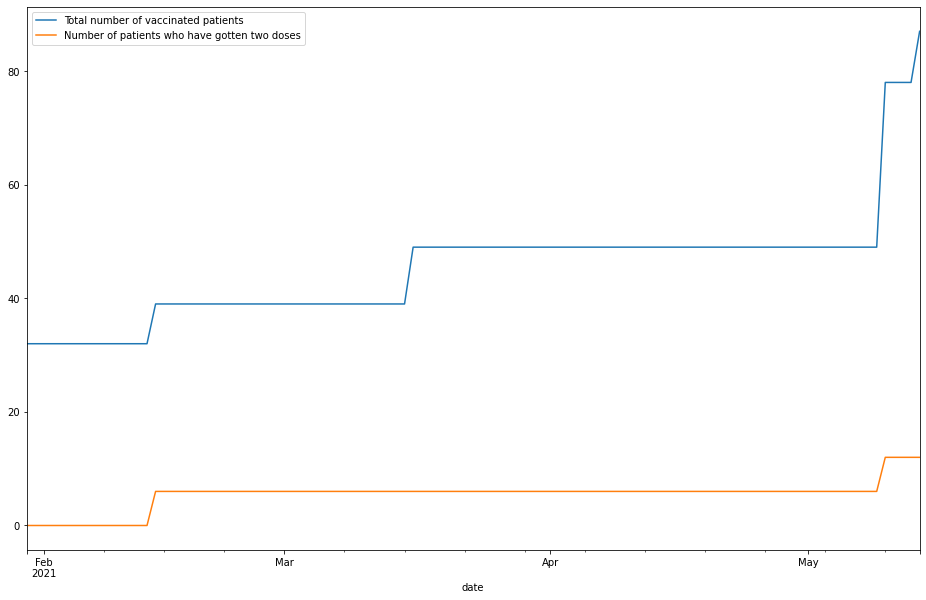

In [ ]:
with engine.connect() as connection:
    vaccine_count_1 = patient_vaccine_sql_table.groupby('date1').size().to_frame('count_1').reset_index()
    vaccine_count_1['date1'] = vaccine_count_1['date1'].apply(pd.to_datetime)
    vaccine_count_1.rename(columns={'date1': 'date'}, inplace=True)
    vaccine_count_2 = patient_vaccine_sql_table.groupby('date2').size().to_frame('count_2').reset_index()
    vaccine_count_2['date2'] = vaccine_count_2['date2'].apply(pd.to_datetime)
    vaccine_count_2.rename(columns={'date2': 'date'}, inplace=True)

    from_date = min(vaccine_count_1['date'])
    to_date = max(vaccine_count_1['date'])
    
    patient_vaccine_count_df = pd.DataFrame({'date': pd.date_range(start=from_date, end=to_date)})
    patient_vaccine_count_df = pd.merge(patient_vaccine_count_df, vaccine_count_1, on='date', how='left')
    patient_vaccine_count_df = pd.merge(patient_vaccine_count_df, vaccine_count_2, on='date', how='left')
    
    patient_vaccine_count_df['count_1'] = patient_vaccine_count_df['count_1'].fillna(0)
    patient_vaccine_count_df['count_2'] = patient_vaccine_count_df['count_2'].fillna(0)
    patient_vaccine_count_df = patient_vaccine_count_df.set_index('date').cumsum()

    ax = patient_vaccine_count_df.plot(figsize=(16, 10))
    ax.legend(
        ['Total number of vaccinated patients', 'Number of patients who have gotten two doses'],
        loc='upper left'
    )

---

<a id="task_10"></a>
[Top](#top)

**10. Suppose that we found out that the nurse with ssNo ”19740919-7140” has been tested
positive for corona on 15.5.2021. You should find the social security numbers and names
of the patients and staff members that the nurse may have met in vaccination events in
the past 10 days? (You are allowed to solve this task using multiple steps and queries).**

In [ ]:
with engine.connect() as connection:
    nurse_ssno = "19740919-7140"
    test_date = "2021-05-15"
    
    nurse_covid_vacc_event_query = \
        f"""
            SELECT VE.location, VE.date FROM Staff S
            JOIN VaccinationEvent VE ON VE.location = S.hospital AND VE.date >= date("{test_date}", "-10 days")
            WHERE S.ssNo = "{nurse_ssno}"
        """
    nurse_covid_vacc_event = pd.read_sql_query(nurse_covid_vacc_event_query, connection)
    display(nurse_covid_vacc_event)

,location,date
0,Tapiola Health Center,2021-05-10


The hospital the nurse is working at has only had one vaccination event during the 10 days period before the day the nurse was tested positive. The event has happened on "2021-05-10" which is a Monday and according to the following query Monday is a shift of the nurse. Note that since we've saved text values of weekdays in the database it is required to find the day of the week beforehand, had we saved numerical values we could've used a condition like Shift.weekday = strftime('%w', '2021-05-10').

In [ ]:
with engine.connect() as connection:
    nurse_covid_shift_query = \
        f"""
            SELECT * FROM Staff
            JOIN Shift ON Shift.worker = Staff.ssNo AND Shift.weekday = 'Monday'
            WHERE Staff.ssNo = "{nurse_ssno}"
        """
    nurse_covid_shift = pd.read_sql_query(nurse_covid_shift_query, connection)
    display(nurse_covid_shift)

,ssNo,name,dateOfBirth,phone,role,vaccinationStatus,hospital,weekday,worker
0,19740919-7140,Deon Hoppe,1974-09-19,040-399-1121,nurse,0,Tapiola Health Center,Monday,19740919-7140


Now all the people that may have met the nurse are the staff of Tapiola Health Center that work on Mondays and the patients that have attended the vaccination event in Tapiola Health Center on 2021-05-10

In [ ]:
with engine.connect() as connection:
    event_location, event_date = nurse_covid_vacc_event.iloc[0]
    
    nurse_covid_patients_staff_query = \
        f"""
            SELECT P.ssNo, P.name FROM Patient P
            JOIN PatientVaccinationEvent PVE ON PVE.patientSsNo = P.ssNo AND PVE.location = "{event_location}" AND PVE.date = "{event_date}"
            UNION
            SELECT S.ssNo, S.name FROM Staff S
            JOIN Shift Sh ON Sh.worker = S.ssNo AND Sh.weekday = 'Monday'
            WHERE S.hospital = "{event_location}" AND S.ssNo <> "{nurse_ssno}"
        """
    
    nurse_covid_patients_staff = pd.read_sql_query(nurse_covid_patients_staff_query, connection)
    display(nurse_covid_patients_staff)

,ssNo,name
0,010327-525G,Dr. Mireille Hansen
1,060421-302M,Faustino Barton
2,080514-3385,Dakota Greenfelder
3,090226-5673,Dr. Lamont Ferry
4,090416-443L,Aliyah Harber
5,130205-474D,Elenora Sawayn
6,19920802-4854,Kaden Tromp
7,19940615-4448,Jordy Hilpert
8,210318-737O,Corine Hane
9,830820-576C,Loyal Hoeger
